In [2]:
import datetime
import dill
from dateutil.relativedelta import relativedelta
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.vq as scv


def blockshaped(arr, nrows, ncols):
    """
    Return an array of shape (n, nrows, ncols) where
    n * nrows * ncols = arr.size

    If arr is a 2D array, the returned array should look like n subblocks with
    each subblock preserving the "physical" layout of arr.
    """
    h, w = arr.shape
    assert h % nrows == 0, f"{h} rows is not evenly divisible by {nrows}"
    assert w % ncols == 0, f"{w} cols is not evenly divisible by {ncols}"
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))

def total_ship_hours_per_block(grid_block_1x1):
    grid_block_1x1 = np.ravel(grid_block_1x1)
    return np.sum(grid_block_1x1)

# def stick_it_together(arrays, final_rows, final_cols, block_rows, block_cols):
#     # Create a nested list to hold the blocks
#     nested_list = []

#     # Iterate over the arrays and divide them into rows
#     for i in range(0, final_rows, block_rows):
#         row_blocks = []
#         for j in range(0, final_cols, block_cols):
#             block = arrays.pop(0)  # Remove the first array from the list
#             row_blocks.append(block)
#         nested_list.append(row_blocks)
#     return np.block(nested_list)

def colormap2arr(arr,cmap):    
    # http://stackoverflow.com/questions/3720840/how-to-reverse-color-map-image-to-scalar-values/3722674#3722674
    gradient=cmap(np.linspace(0.0,1.0,100))

    # Reshape arr to something like (240*240, 4), all the 4-tuples in a long list...
    arr2=arr.reshape((arr.shape[0]*arr.shape[1],arr.shape[2]))
    print(arr2.shape)

    # Use vector quantization to shift the values in arr2 to the nearest point in
    # the code book (gradient).
    code,dist=scv.vq(arr2,gradient)

    # code is an array of length arr2 (240*240), holding the code book index for
    # each observation. (arr2 are the "observations".)
    # Scale the values so they are from 0 to 1.
    values=code.astype('float')/gradient.shape[0]

    # Reshape values back to (240,240)
    values=values.reshape(1800, 3600)
    values=values[::-1]
    return values

def stick_back(arr):
    return arr.reshape(180,360)

def task():
    curr_date = datetime.date(2011, 4, 1)
    end_date = datetime.date(2020, 12, 31)
    sum_array = np.zeros((1800,3600))
    while curr_date < end_date:
        arr=plt.imread(f'{curr_date}_10km_density.png')
        values=colormap2arr(arr,cm.jet)
        sum_array = np.add(sum_array, values)
        if curr_date.month == 12:
            if curr_date.year == 2011:
                sum_array = sum_array * (1/9)
            else:
                sum_array = sum_array * (1/12)

            grids = blockshaped(sum_array, 10, 10)
            converted = np.array([total_ship_hours_per_block(i) for i in grids])
            stuck_back = stick_back(converted)
            stuck_back = stuck_back * 100
            file_p = open(f'{curr_date}_sum_high_res_start.pickle', 'wb')
            dill.dump(stuck_back, file = file_p)
            file_p.close()
            sum_array = np.zeros((1800,3600))
        curr_date += relativedelta(months=1)

task()

(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)
(6480000, 4)

(180, 360, 2)
(180, 360, 3)
(180, 360, 4)
(180, 360, 5)
(180, 360, 6)
(180, 360, 7)
(180, 360, 8)
(180, 360, 9)
(180, 360, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0.

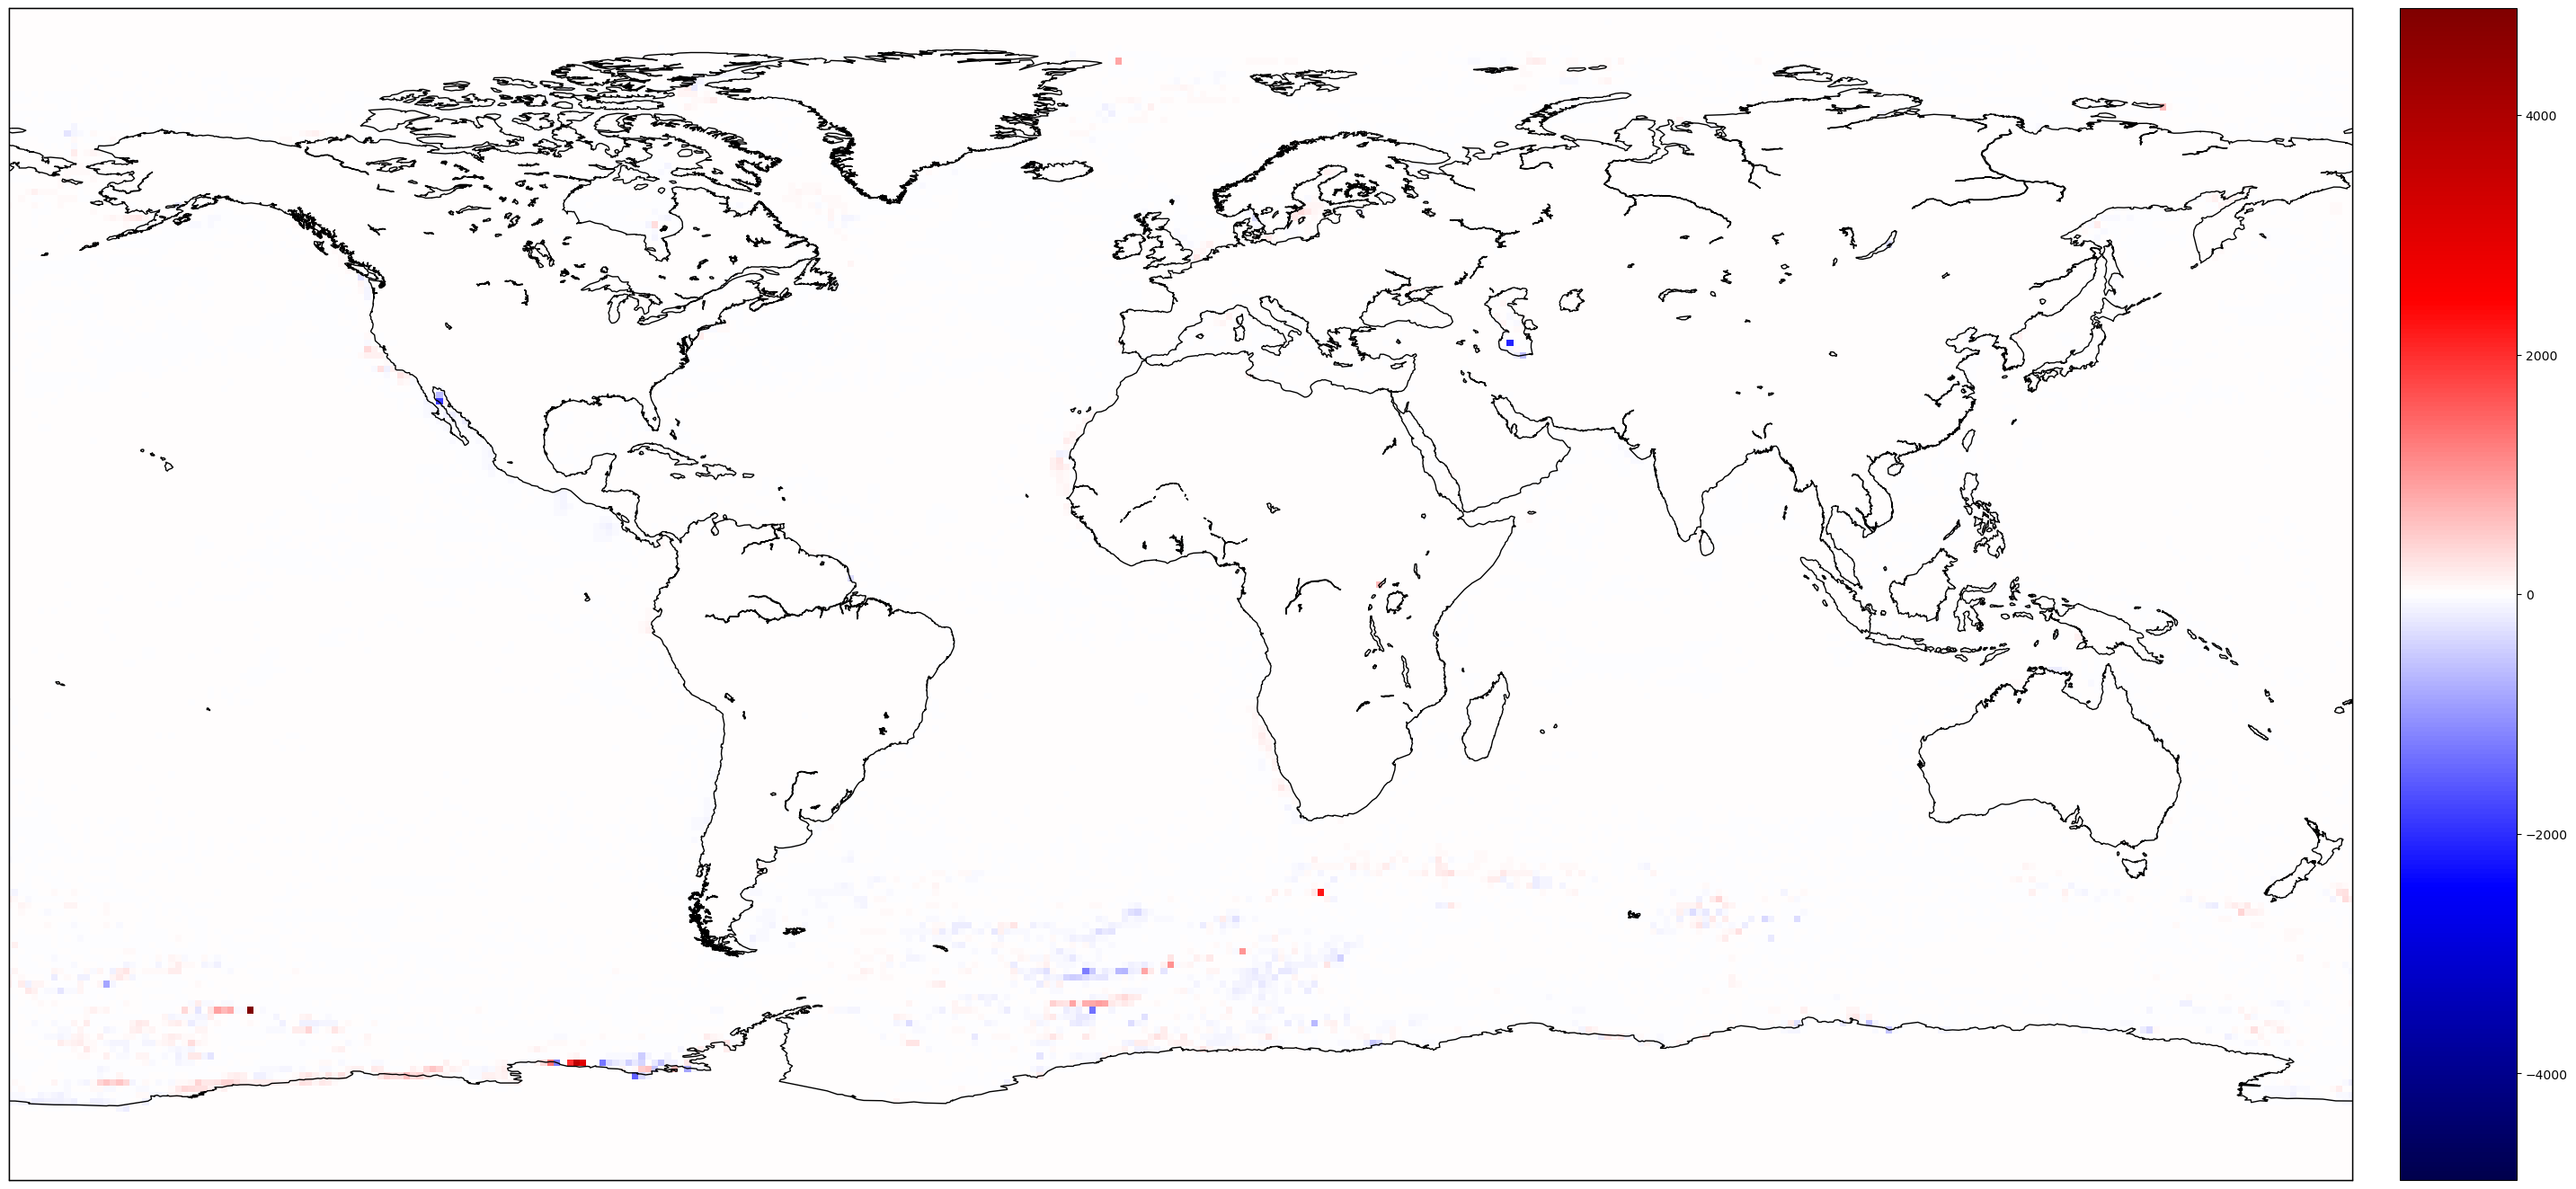

In [8]:
import scipy
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors

curr_date = datetime.date(2011, 12, 1)
end_date = datetime.date(2020, 12, 31)

def stackinator(array1, array2):
    return np.dstack((array1, array2))

def linear_regress(array1, array2):
    try:
        result = scipy.stats.linregress(array1, array2)
        return result.slope
    except:
        print(array1, array2)
        return 0

file_p = open(f'{curr_date}_sum_high_res_start.pickle', 'rb')
init_array = np.load(file_p, allow_pickle=True)
file_p.close()
curr_date += relativedelta(years=1)

while curr_date < end_date:
    file_p = open(f'{curr_date}_sum_high_res_start.pickle', 'rb')
    shibal = np.load(file_p, allow_pickle=True)
    file_p.close()
    init_array = stackinator(init_array,shibal)
    print(init_array.shape)
    curr_date += relativedelta(years=1)

init_array_bloom = np.load(open("./bloom/Dominic/stacked1x1.pickle", "rb"), allow_pickle = True)
init_array_bloom = np.flip(init_array_bloom, 0)
nibba = np.zeros((180, 360))
for indexi, row in enumerate(init_array):
    for indexj, col in enumerate(row):
        nibba[indexi][indexj] = linear_regress(init_array[indexi][indexj], init_array_bloom[indexi][indexj])

print(nibba.size)
file_p = open(f'linear_ship_high_res.pickle', 'wb')
dill.dump(nibba, file = file_p)
file_p.close()
fig, ax = plt.subplots(figsize=(36,72))

m = Basemap(projection='cyl', epsg=4326, lat_0=0, lon_0=0, resolution='l')
lon = np.linspace(-180, 180, 360)
lat = np.linspace(-90, 90, 180)
lon_grid, lat_grid = np.meshgrid(lon, lat)
# nibba = np.flip(nibba, 0)
colourmesh = m.pcolor(lon_grid, lat_grid, data=nibba, cmap="seismic", norm=colors.CenteredNorm())
pos = m.imshow(nibba)
m.colorbar(colourmesh)
m.drawcoastlines()
# m.drawcountries()
m.drawmapboundary()

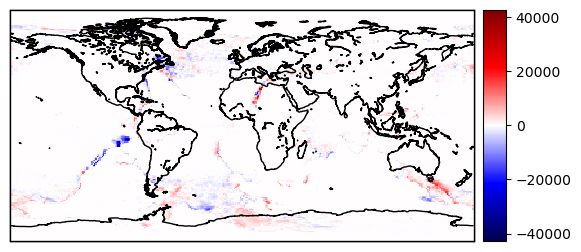

In [7]:
def linear_regress(array2):
    index = np.arange(1,11)
    result = scipy.stats.linregress(index, array2)
    return result.slope
isit_flipped = np.apply_along_axis(linear_regress, 2, init_array_bloom)

m = Basemap(projection='cyl', epsg=4326, lat_0=0, lon_0=0, resolution='l')
lon = np.linspace(-180, 180, 360)
lat = np.linspace(-90, 90, 180)
lon_grid, lat_grid = np.meshgrid(lon, lat)
# nibba = np.flip(nibba, 0)
colourmesh = m.pcolor(lon_grid, lat_grid, data=isit_flipped, cmap="seismic", norm=colors.CenteredNorm())
pos = m.imshow(nibba)
m.colorbar(colourmesh)
m.drawcoastlines()
# m.drawcountries()
m.drawmapboundary()

(180, 360, 2)
(180, 360, 3)
(180, 360, 4)
(180, 360, 5)
(180, 360, 6)
(180, 360, 7)
(180, 360, 8)
(180, 360, 9)
(180, 360, 10)
64800


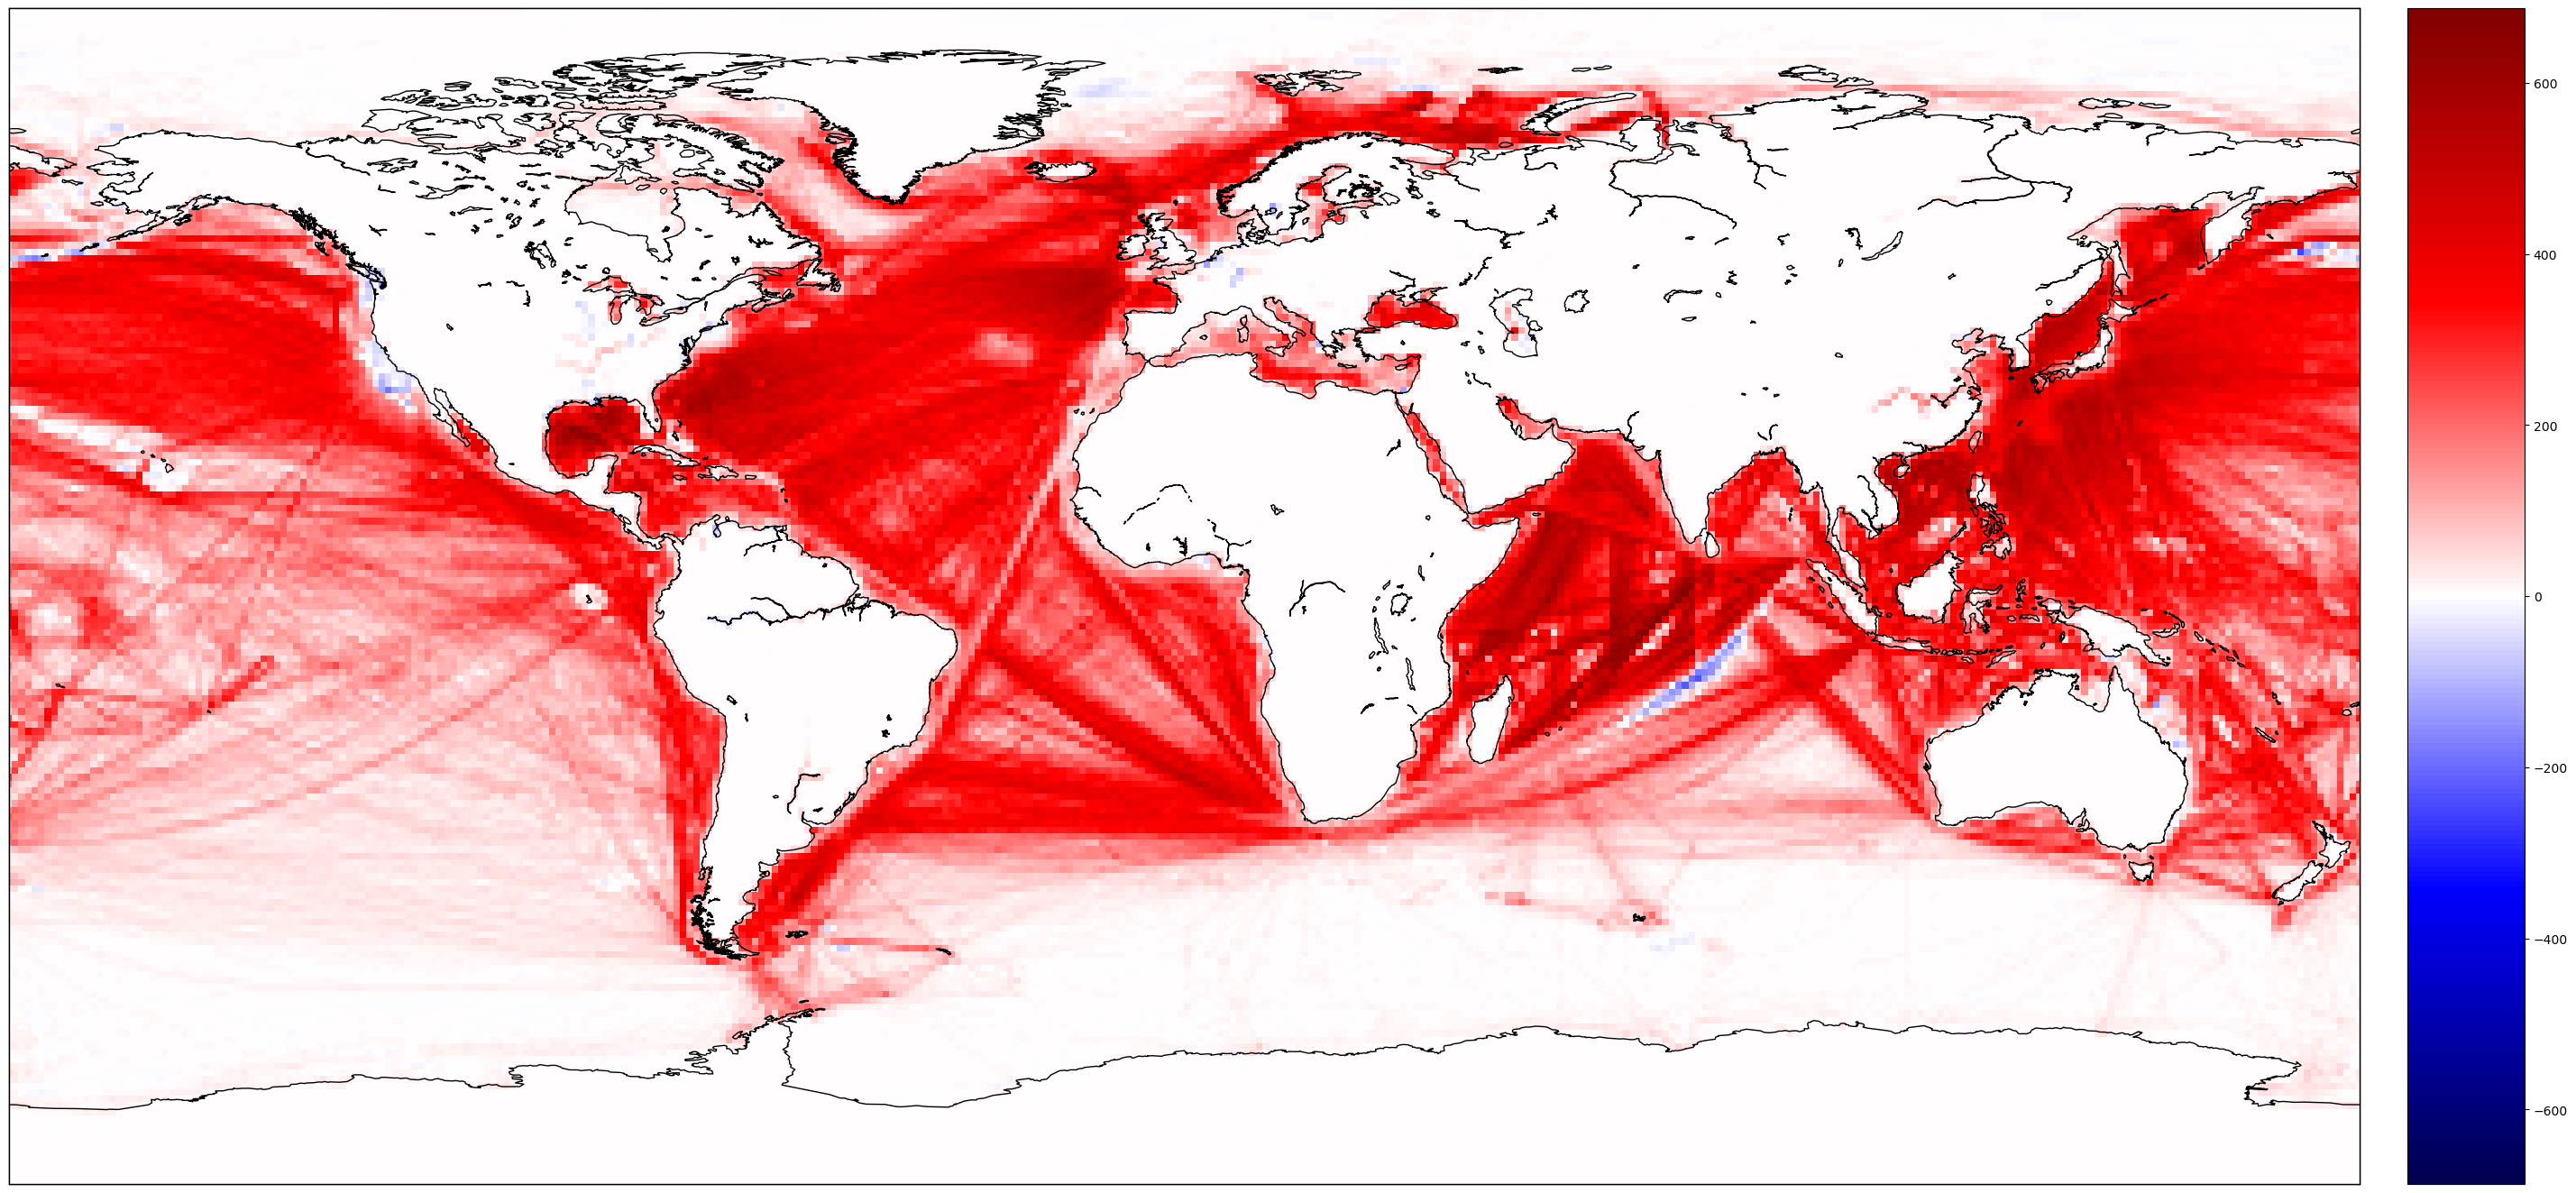

In [9]:
import scipy
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors

curr_date = datetime.date(2011, 12, 1)
end_date = datetime.date(2020, 12, 31)

def stackinator(array1, array2):
    return np.dstack((array1, array2))

def linear_regress(array2):
    index = np.arange(1,11)
    result = scipy.stats.linregress(index, array2)
    return result.slope


file_p = open(f'{curr_date}_sum_high_res_start.pickle', 'rb')
init_array = np.load(file_p, allow_pickle=True)
file_p.close()
curr_date += relativedelta(years=1)

while curr_date < end_date:
    file_p = open(f'{curr_date}_sum_high_res_start.pickle', 'rb')
    shibal = np.load(file_p, allow_pickle=True)
    file_p.close()
    init_array = stackinator(init_array,shibal)
    print(init_array.shape)
    curr_date += relativedelta(years=1)

nibba = np.apply_along_axis(linear_regress, 2, init_array)
print(nibba.size)
file_p = open(f'linear_ship_high_res.pickle', 'wb')
dill.dump(nibba, file = file_p)
file_p.close()
fig, ax = plt.subplots(figsize=(36,72))

m = Basemap(projection='cyl', epsg=4326, lat_0=0, lon_0=0, resolution='l')
lon = np.linspace(-180, 180, 360)
lat = np.linspace(-90, 90, 180)
lon_grid, lat_grid = np.meshgrid(lon, lat)
# nibba = np.flip(nibba, 0)
colourmesh = m.pcolor(lon_grid, lat_grid, data=nibba, cmap="seismic", norm=colors.CenteredNorm())
pos = m.imshow(nibba)
m.colorbar(colourmesh)
m.drawcoastlines()
# m.drawcountries()
m.drawmapboundary()